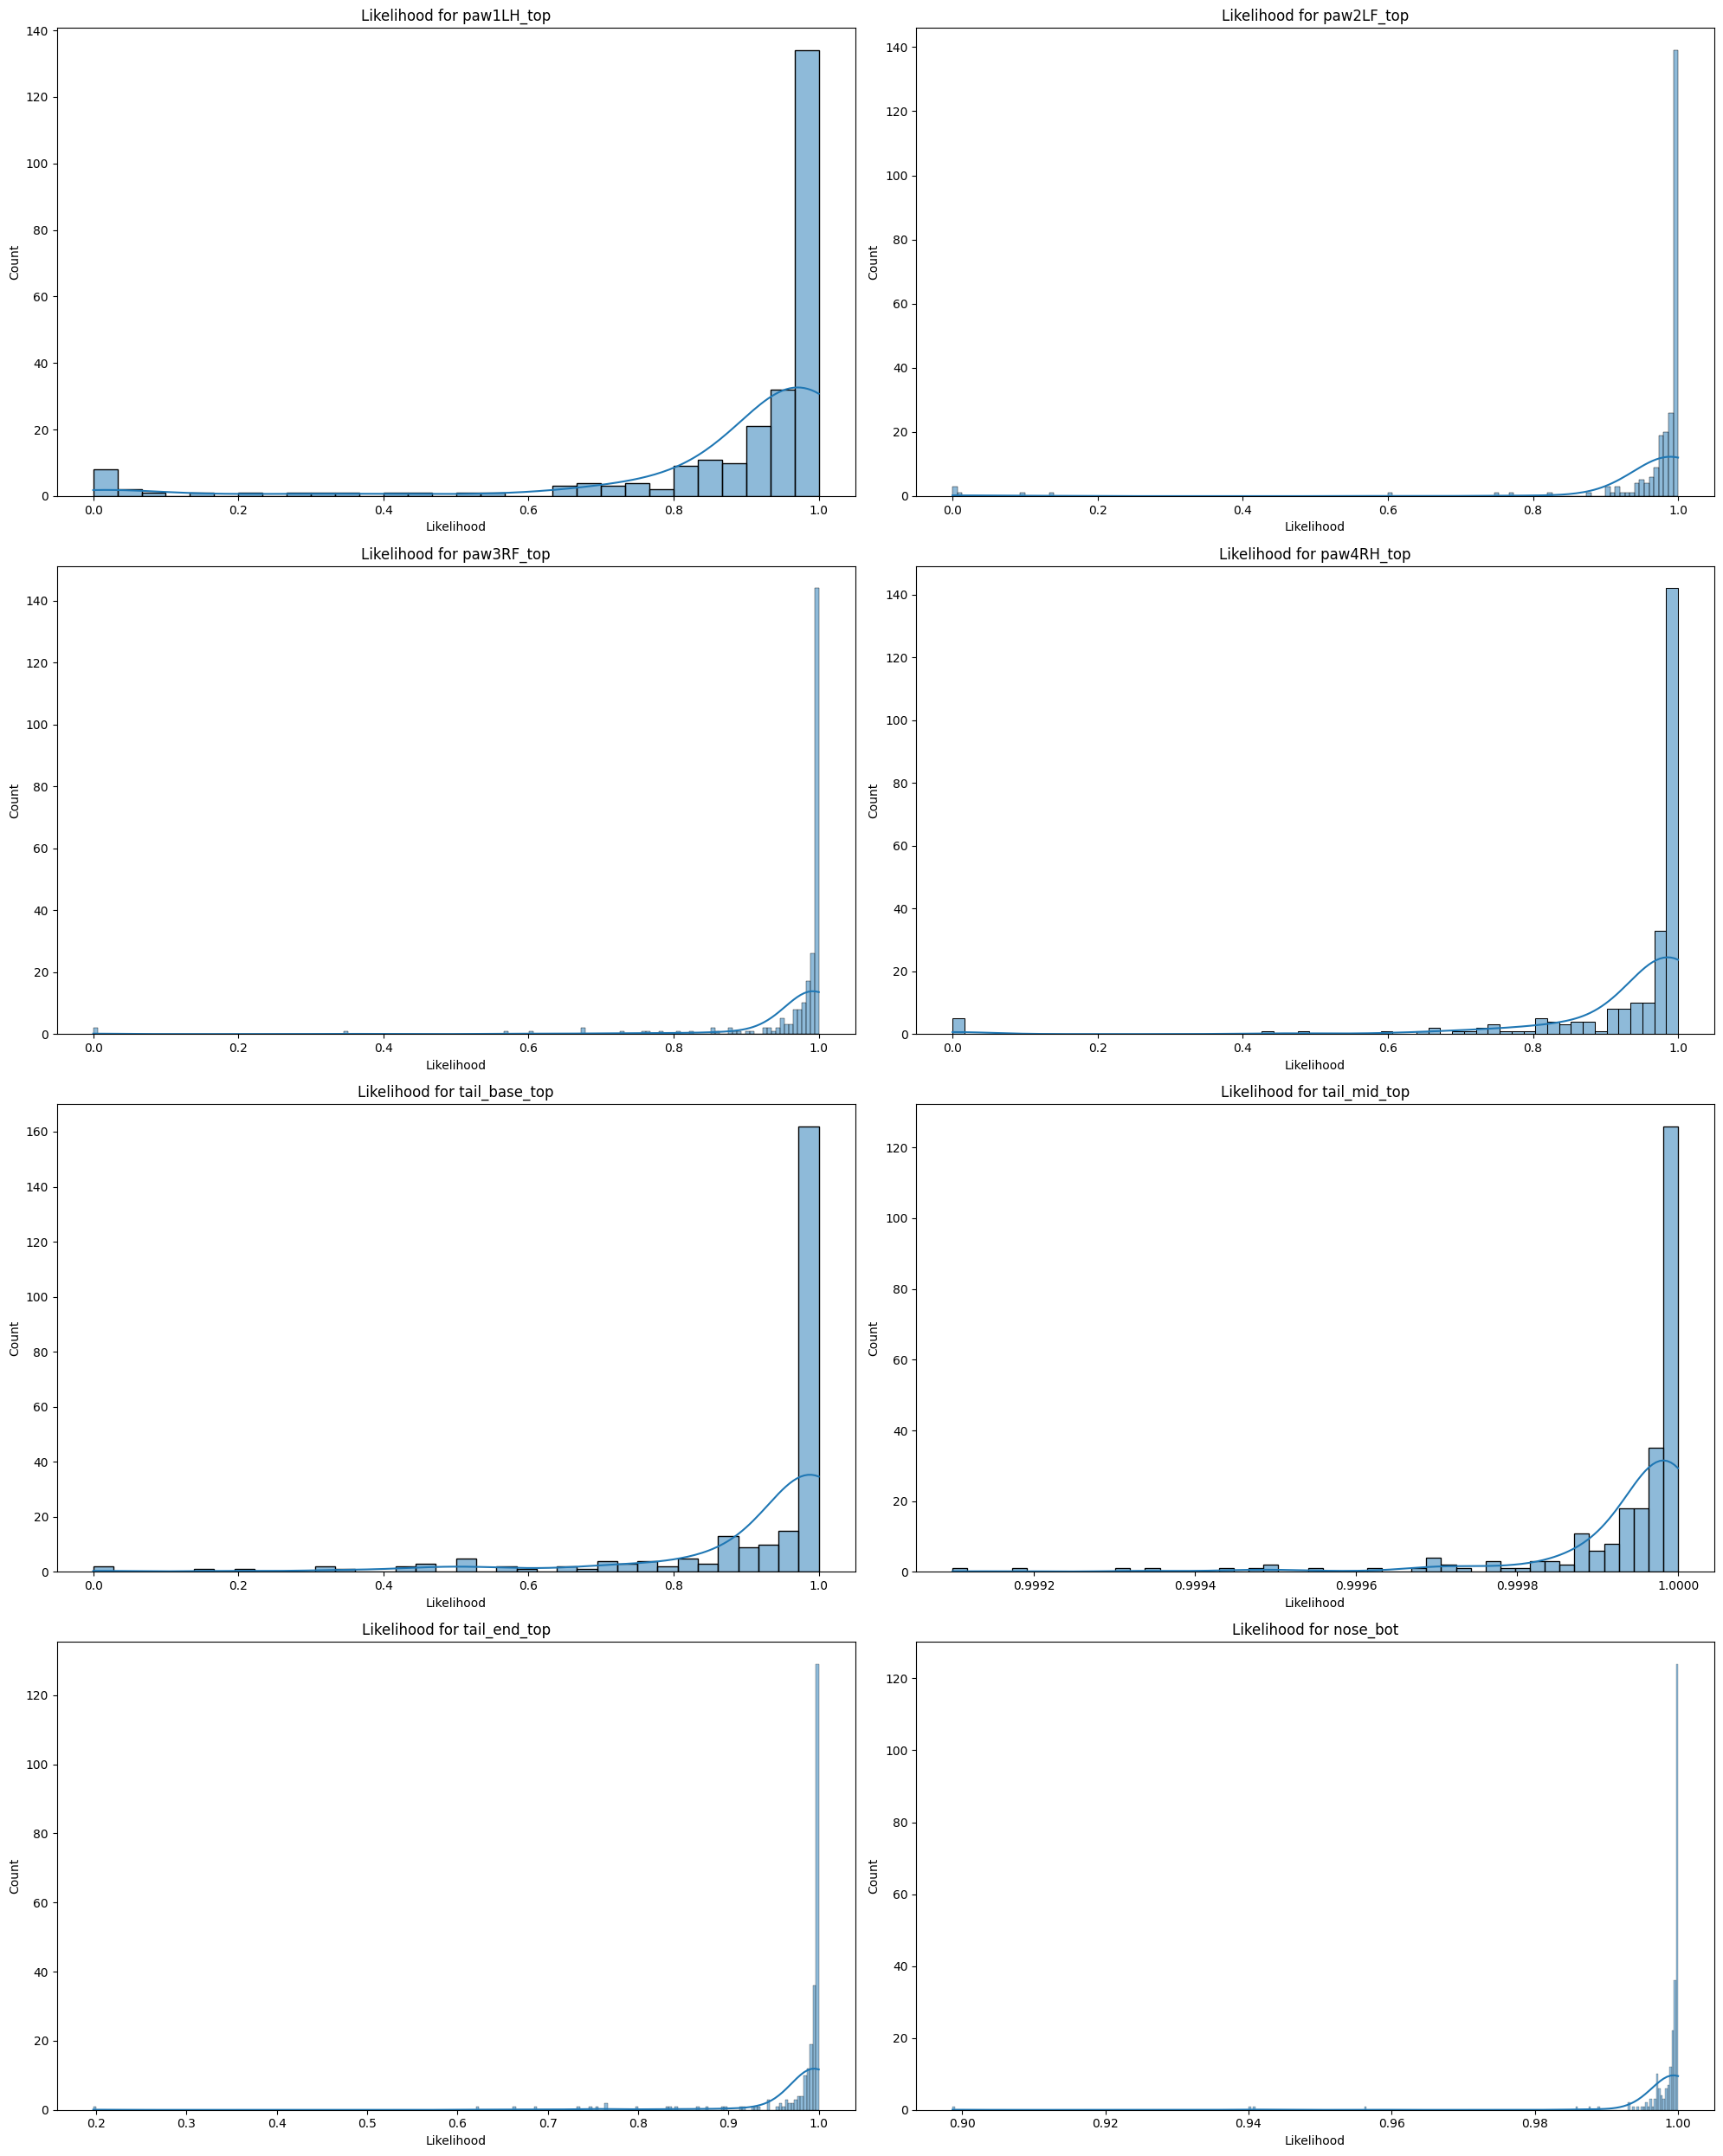

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng0/predictions_new.csv"


data = pd.read_csv(file_path)

# Extract the likelihood columns for each keypoint
keypoints_with_likelihood = {
    'paw1LH_top': 'heatmap_tracker.2',
    'paw2LF_top': 'heatmap_tracker.5',
    'paw3RF_top': 'heatmap_tracker.8',
    'paw4RH_top': 'heatmap_tracker.11',
    'tail_base_top': 'heatmap_tracker.17',
    'tail_mid_top': 'heatmap_tracker.20',
    'tail_end_top': 'heatmap_tracker.23',
    'nose_bot': 'heatmap_tracker.44'
}

# Convert the relevant columns to numeric and store them in a dictionary
likelihood_data = {keypoint: pd.to_numeric(data[col][2:]) for keypoint, col in keypoints_with_likelihood.items()}

# Plot histograms for the likelihood values of each keypoint
plt.figure(figsize=(20, 25))

for i, (keypoint, values) in enumerate(likelihood_data.items()):
    plt.subplot(4, 2, i + 1)
    sns.histplot(values, kde=True)
    plt.title(f'Likelihood for {keypoint}')
    plt.xlabel('Likelihood')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


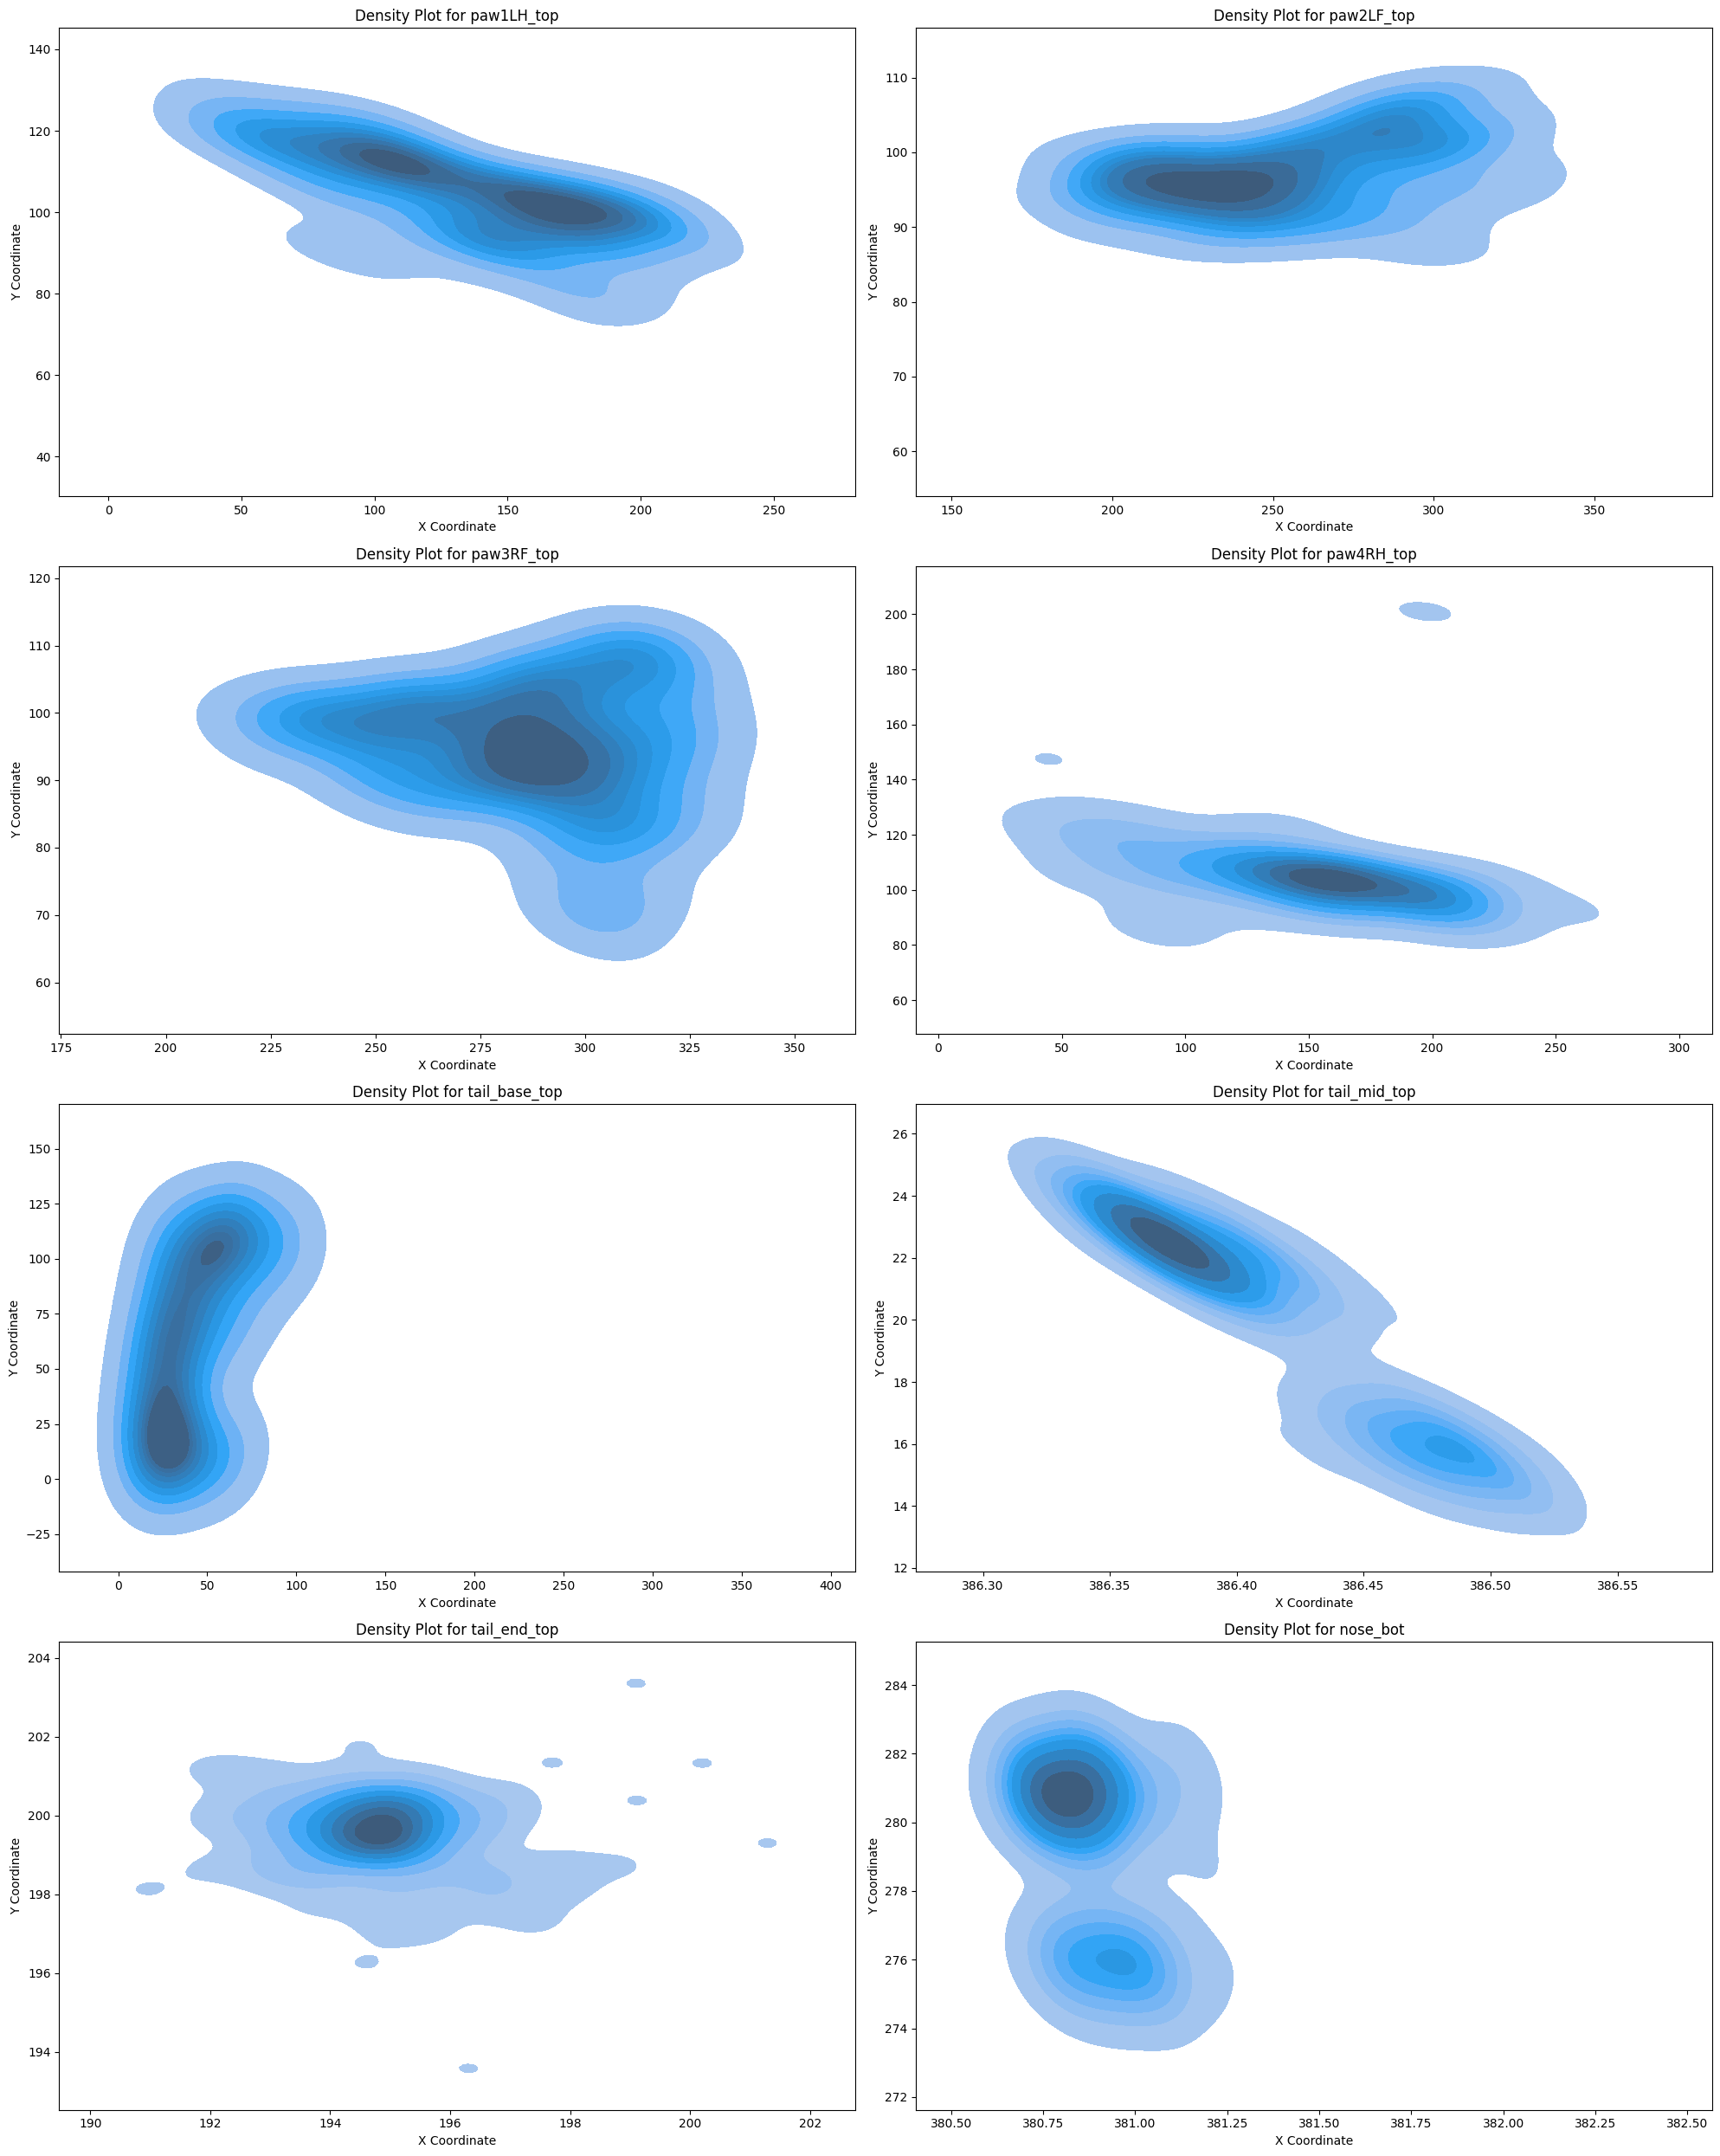

In [7]:
# Extract coordinates for each keypoint
keypoints_with_coords = {
    'paw1LH_top': ('heatmap_tracker', 'heatmap_tracker.1'),
    'paw2LF_top': ('heatmap_tracker.3', 'heatmap_tracker.4'),
    'paw3RF_top': ('heatmap_tracker.6', 'heatmap_tracker.7'),
    'paw4RH_top': ('heatmap_tracker.9', 'heatmap_tracker.10'),
    'tail_base_top': ('heatmap_tracker.15', 'heatmap_tracker.16'),
    'tail_mid_top': ('heatmap_tracker.18', 'heatmap_tracker.19'),
    'tail_end_top': ('heatmap_tracker.21', 'heatmap_tracker.22'),
    'nose_bot': ('heatmap_tracker.42', 'heatmap_tracker.43')
}

# Convert the relevant columns to numeric and store them in a dictionary
coords_data = {keypoint: (pd.to_numeric(data[x_col][2:]), pd.to_numeric(data[y_col][2:])) for keypoint, (x_col, y_col) in keypoints_with_coords.items()}

# Plot density plots for the coordinates of each keypoint
plt.figure(figsize=(20, 25))

for i, (keypoint, (x_coords, y_coords)) in enumerate(coords_data.items()):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=x_coords, y=y_coords, fill=True)
    plt.title(f'Density Plot for {keypoint}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

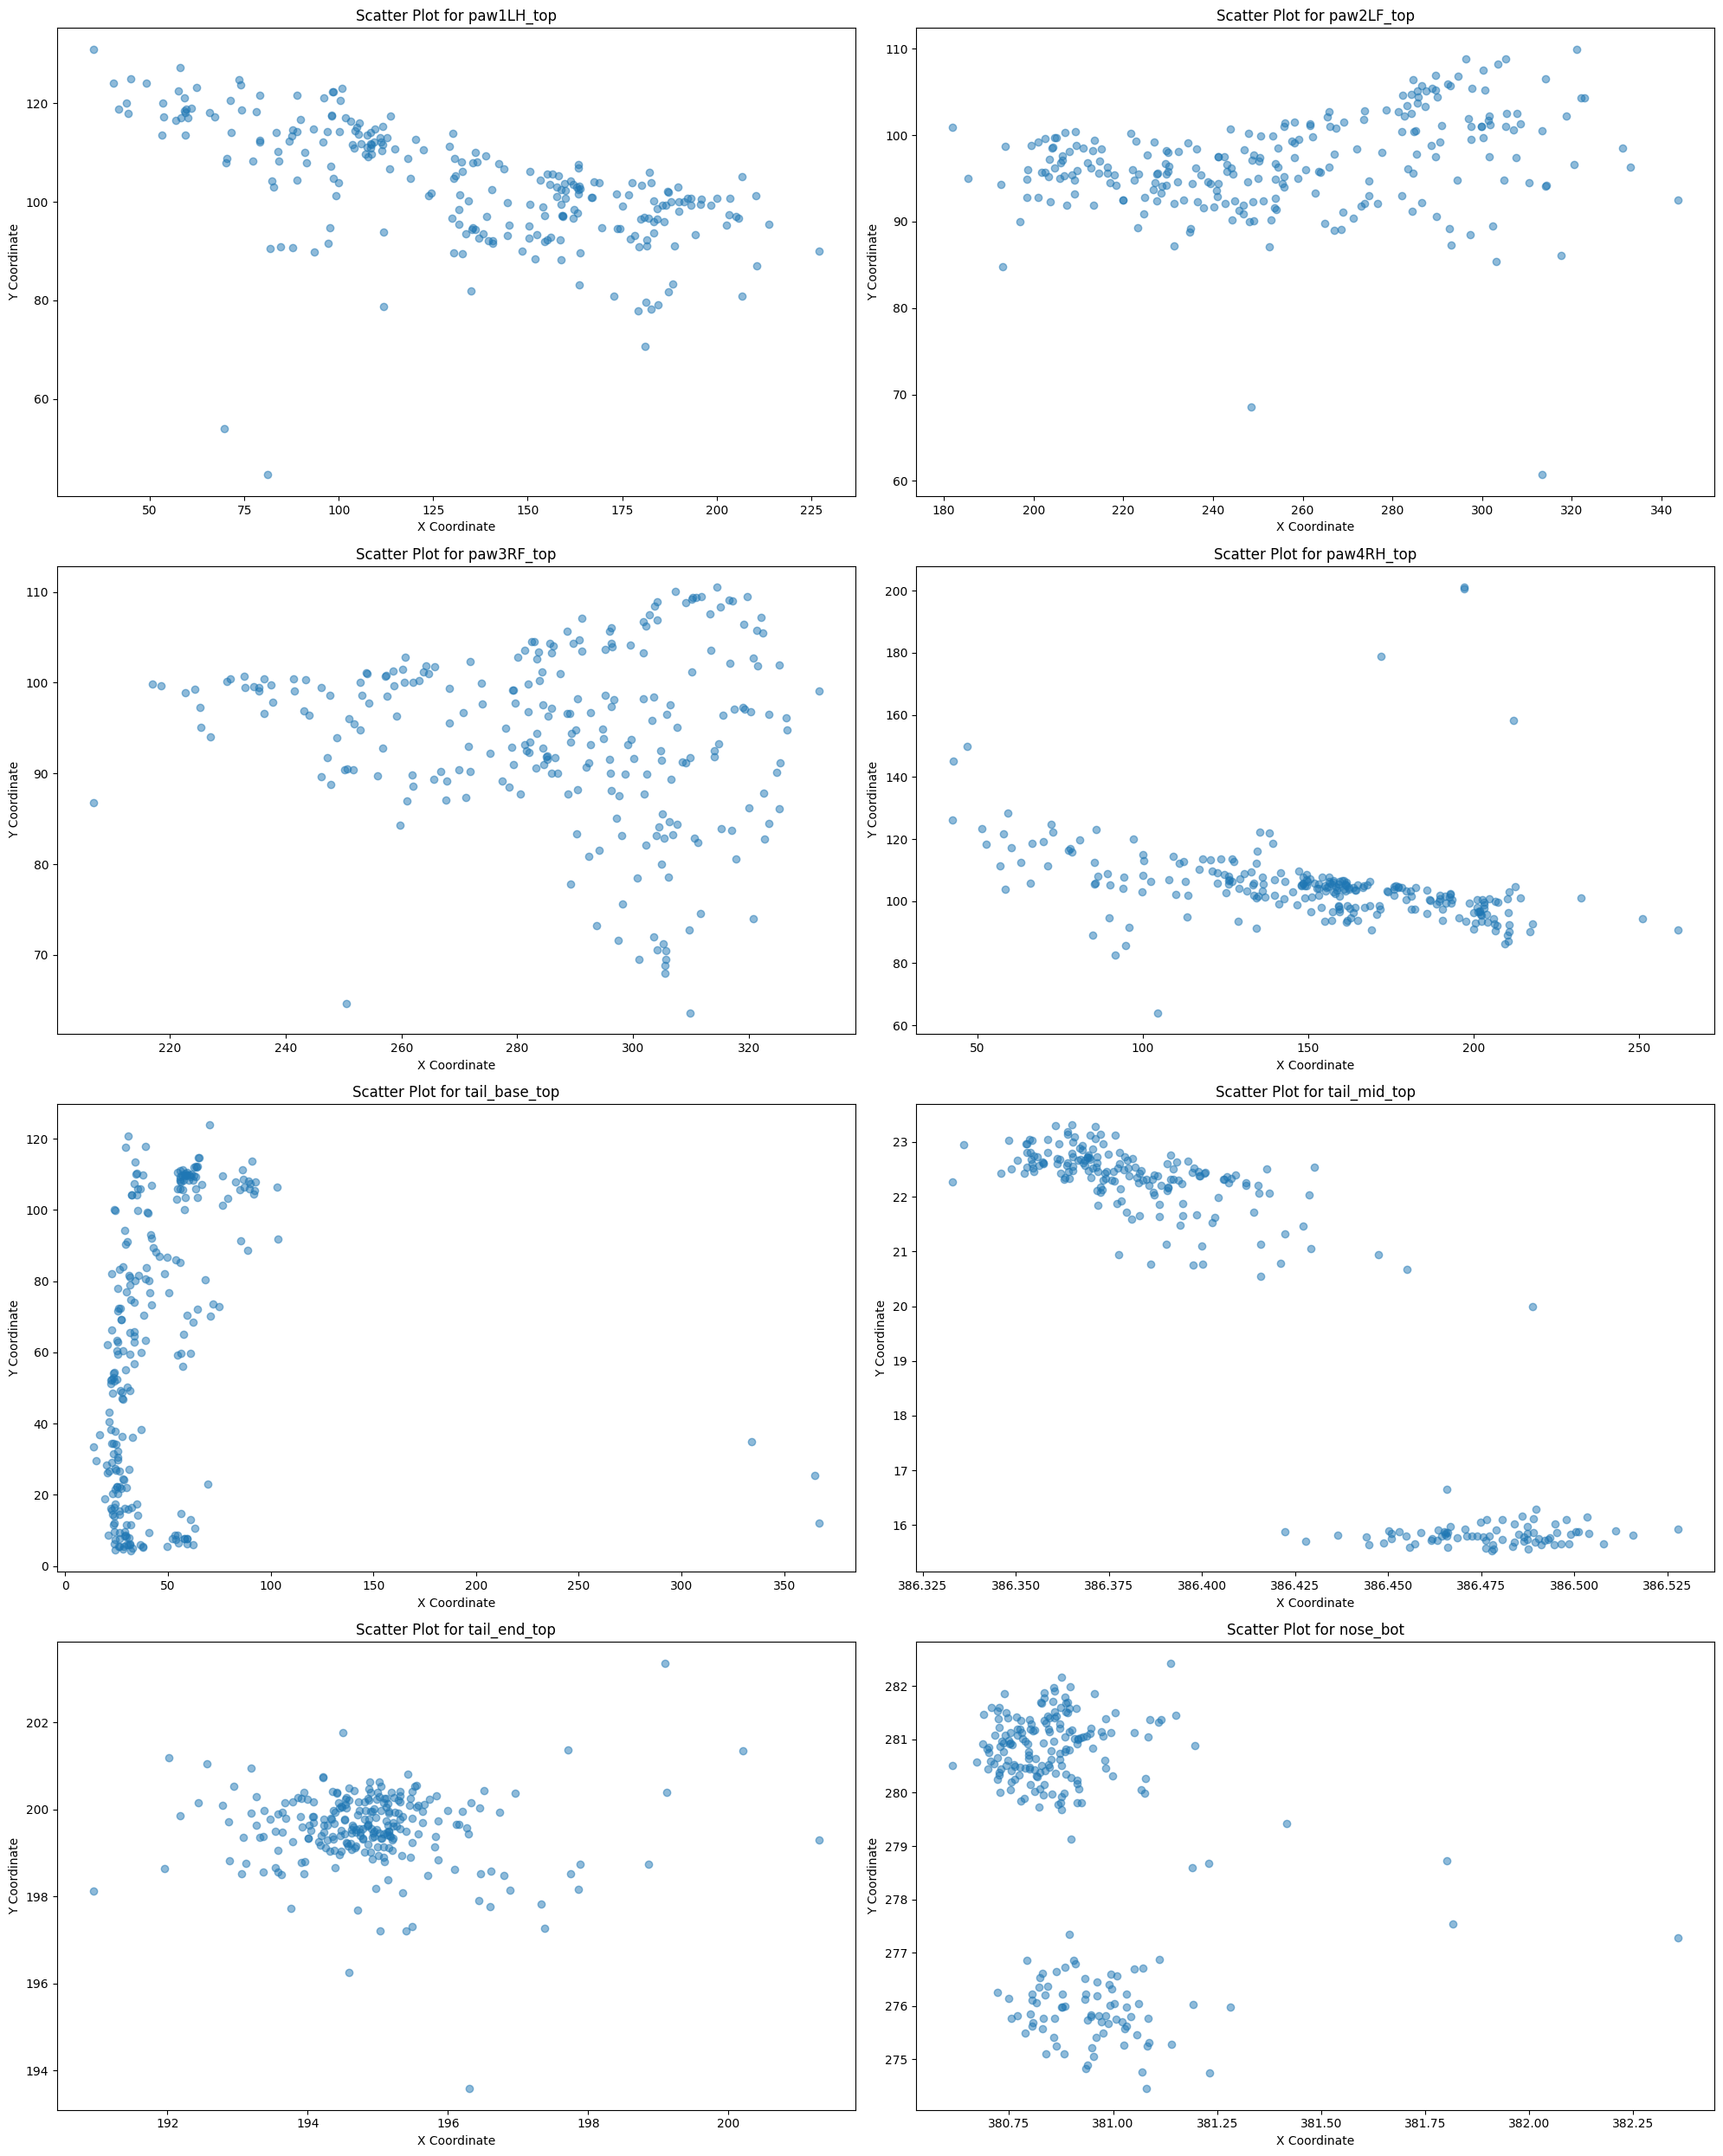

In [8]:
# Extract coordinates for each keypoint
keypoints_with_coords = {
    'paw1LH_top': ('heatmap_tracker', 'heatmap_tracker.1'),
    'paw2LF_top': ('heatmap_tracker.3', 'heatmap_tracker.4'),
    'paw3RF_top': ('heatmap_tracker.6', 'heatmap_tracker.7'),
    'paw4RH_top': ('heatmap_tracker.9', 'heatmap_tracker.10'),
    'tail_base_top': ('heatmap_tracker.15', 'heatmap_tracker.16'),
    'tail_mid_top': ('heatmap_tracker.18', 'heatmap_tracker.19'),
    'tail_end_top': ('heatmap_tracker.21', 'heatmap_tracker.22'),
    'nose_bot': ('heatmap_tracker.42', 'heatmap_tracker.43')
}

# Convert the relevant columns to numeric and store them in a dictionary
coords_data = {keypoint: (pd.to_numeric(data[x_col][2:]), pd.to_numeric(data[y_col][2:])) for keypoint, (x_col, y_col) in keypoints_with_coords.items()}

# Plot scatter plots for the coordinates of each keypoint
plt.figure(figsize=(20, 25))

for i, (keypoint, (x_coords, y_coords)) in enumerate(coords_data.items()):
    plt.subplot(4, 2, i + 1)
    plt.scatter(x_coords, y_coords, alpha=0.5)
    plt.title(f'Scatter Plot for {keypoint}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

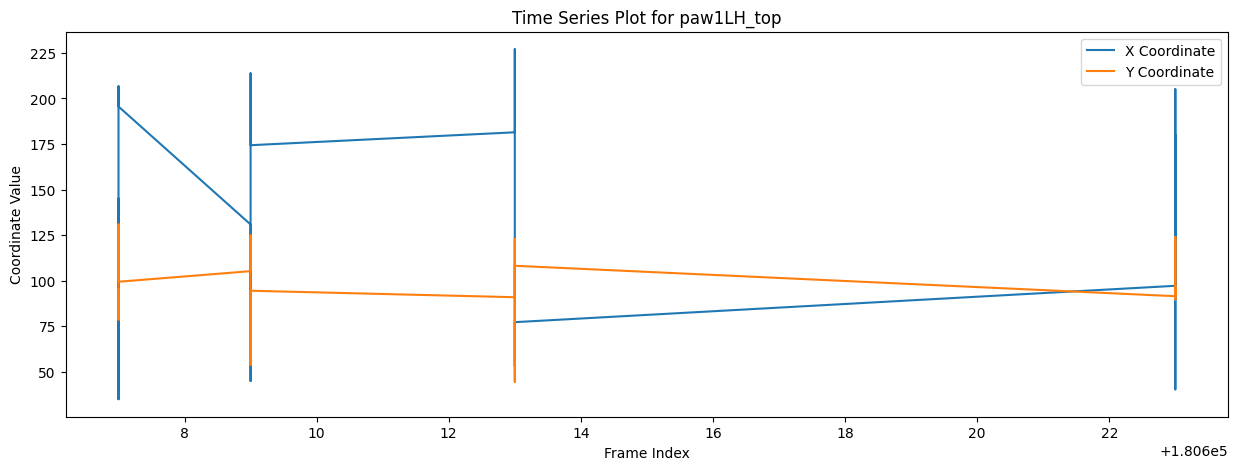

In [10]:
# Plot time series for 'paw1LH_top' keypoint
frame_indices = data.iloc[2:, 0].str.extract(r'(\d+)', expand=False).astype(int)
x_coords = pd.to_numeric(data['heatmap_tracker'][2:])
y_coords = pd.to_numeric(data['heatmap_tracker.1'][2:])

plt.figure(figsize=(15, 5))
plt.plot(frame_indices, x_coords, label='X Coordinate')
plt.plot(frame_indices, y_coords, label='Y Coordinate')
plt.title('Time Series Plot for paw1LH_top')
plt.xlabel('Frame Index')
plt.ylabel('Coordinate Value')
plt.legend()
plt.show()

In [3]:
data = pd.read_csv(file_path)

# Extract frame filenames
frames = data.iloc[2:, 0].values

# Extract keypoints and their corresponding columns
keypoints_with_cols = {
    'paw1LH_top': ('heatmap_tracker', 'heatmap_tracker.1', 'heatmap_tracker.2'),
    'paw2LF_top': ('heatmap_tracker.3', 'heatmap_tracker.4', 'heatmap_tracker.5'),
    'paw3RF_top': ('heatmap_tracker.6', 'heatmap_tracker.7', 'heatmap_tracker.8'),
    'paw4RH_top': ('heatmap_tracker.9', 'heatmap_tracker.10', 'heatmap_tracker.11'),
    'tail_base_top': ('heatmap_tracker.15', 'heatmap_tracker.16', 'heatmap_tracker.17'),
    'tail_mid_top': ('heatmap_tracker.18', 'heatmap_tracker.19', 'heatmap_tracker.20'),
    'tail_end_top': ('heatmap_tracker.21', 'heatmap_tracker.22', 'heatmap_tracker.23'),
    'nose_bot': ('heatmap_tracker.42', 'heatmap_tracker.43', 'heatmap_tracker.44')
}

# Prepare the list to hold new structured data
new_data = []

# Iterate over each frame and each keypoint to create the new structure
for i, frame in enumerate(frames):
    for keypoint, (x_col, y_col, likelihood_col) in keypoints_with_cols.items():
        new_row = {
            'frame': frame,
            'keypoint': keypoint,
            'x': pd.to_numeric(data[x_col].iloc[2 + i], errors='coerce'),
            'y': pd.to_numeric(data[y_col].iloc[2 + i], errors='coerce'),
            'likelihood': pd.to_numeric(data[likelihood_col].iloc[2 + i], errors='coerce')
        }
        new_data.append(new_row)

# Create a new DataFrame from the structured data
new_df = pd.DataFrame(new_data)
new_df

,frame,keypoint,x,y,likelihood
0,labeled-data/180607_004/img015278.png,paw1LH_top,145.031677,95.310852,0.904747
1,labeled-data/180607_004/img015278.png,paw2LF_top,247.722275,94.560287,0.996503
2,labeled-data/180607_004/img015278.png,paw3RF_top,265.542480,89.333633,0.969812
3,labeled-data/180607_004/img015278.png,paw4RH_top,148.442825,105.648239,0.999965
4,labeled-data/180607_004/img015278.png,tail_base_top,25.818769,20.363697,0.999940
...,...,...,...,...,...
2019,labeled-data/180623_000/img107274.png,paw4RH_top,181.267334,97.296921,0.971233
2020,labeled-data/180623_000/img107274.png,tail_base_top,23.581369,31.467033,0.817335
2021,labeled-data/180623_000/img107274.png,tail_mid_top,386.377472,22.529795,0.999889
2022,labeled-data/180623_000/img107274.png,tail_end_top,195.017700,200.619598,0.995964


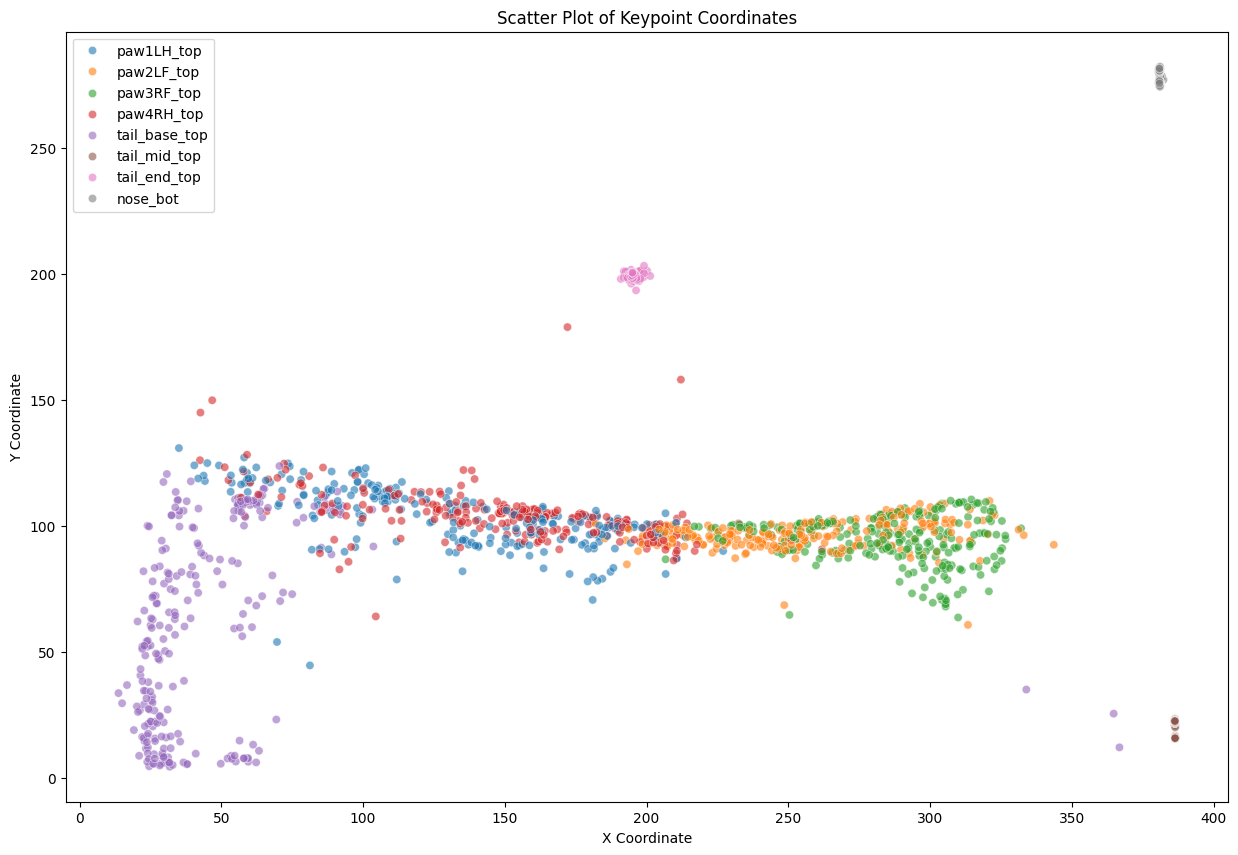

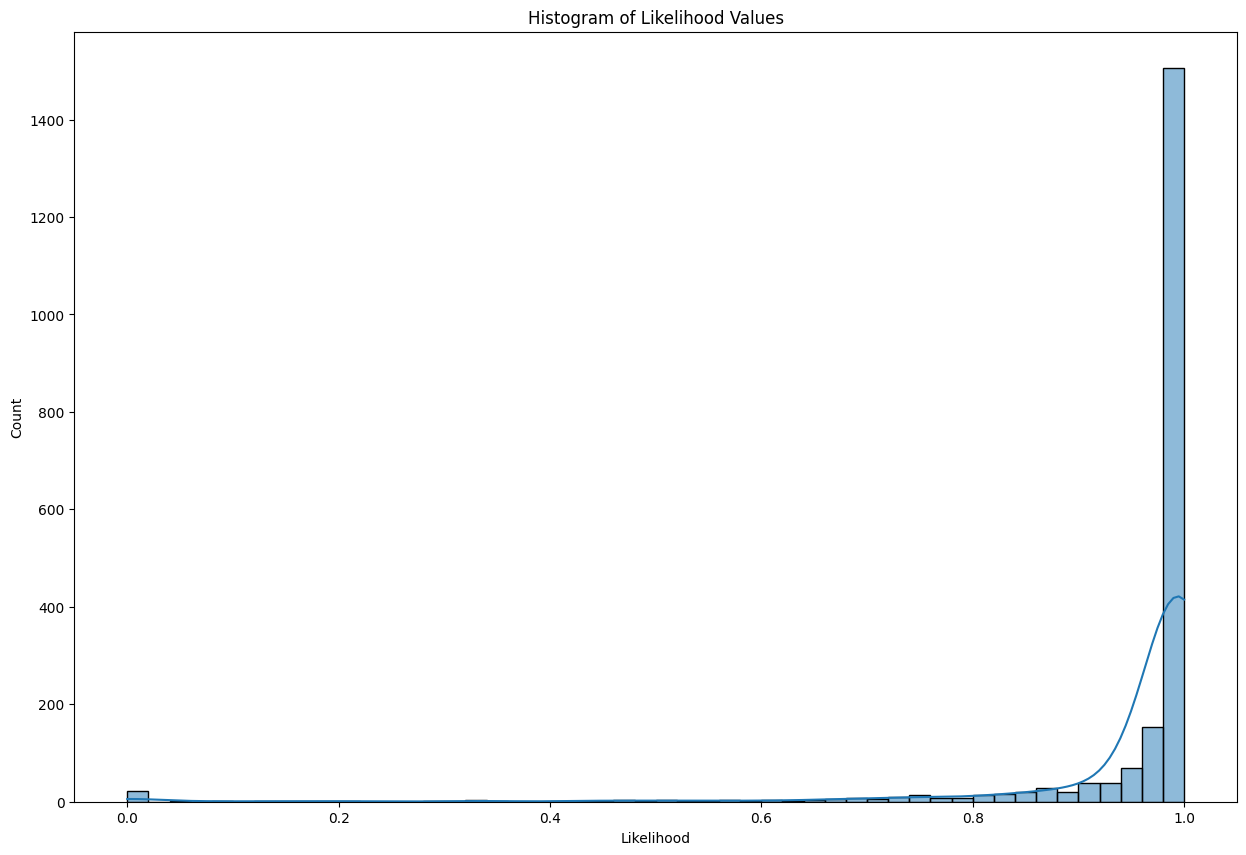

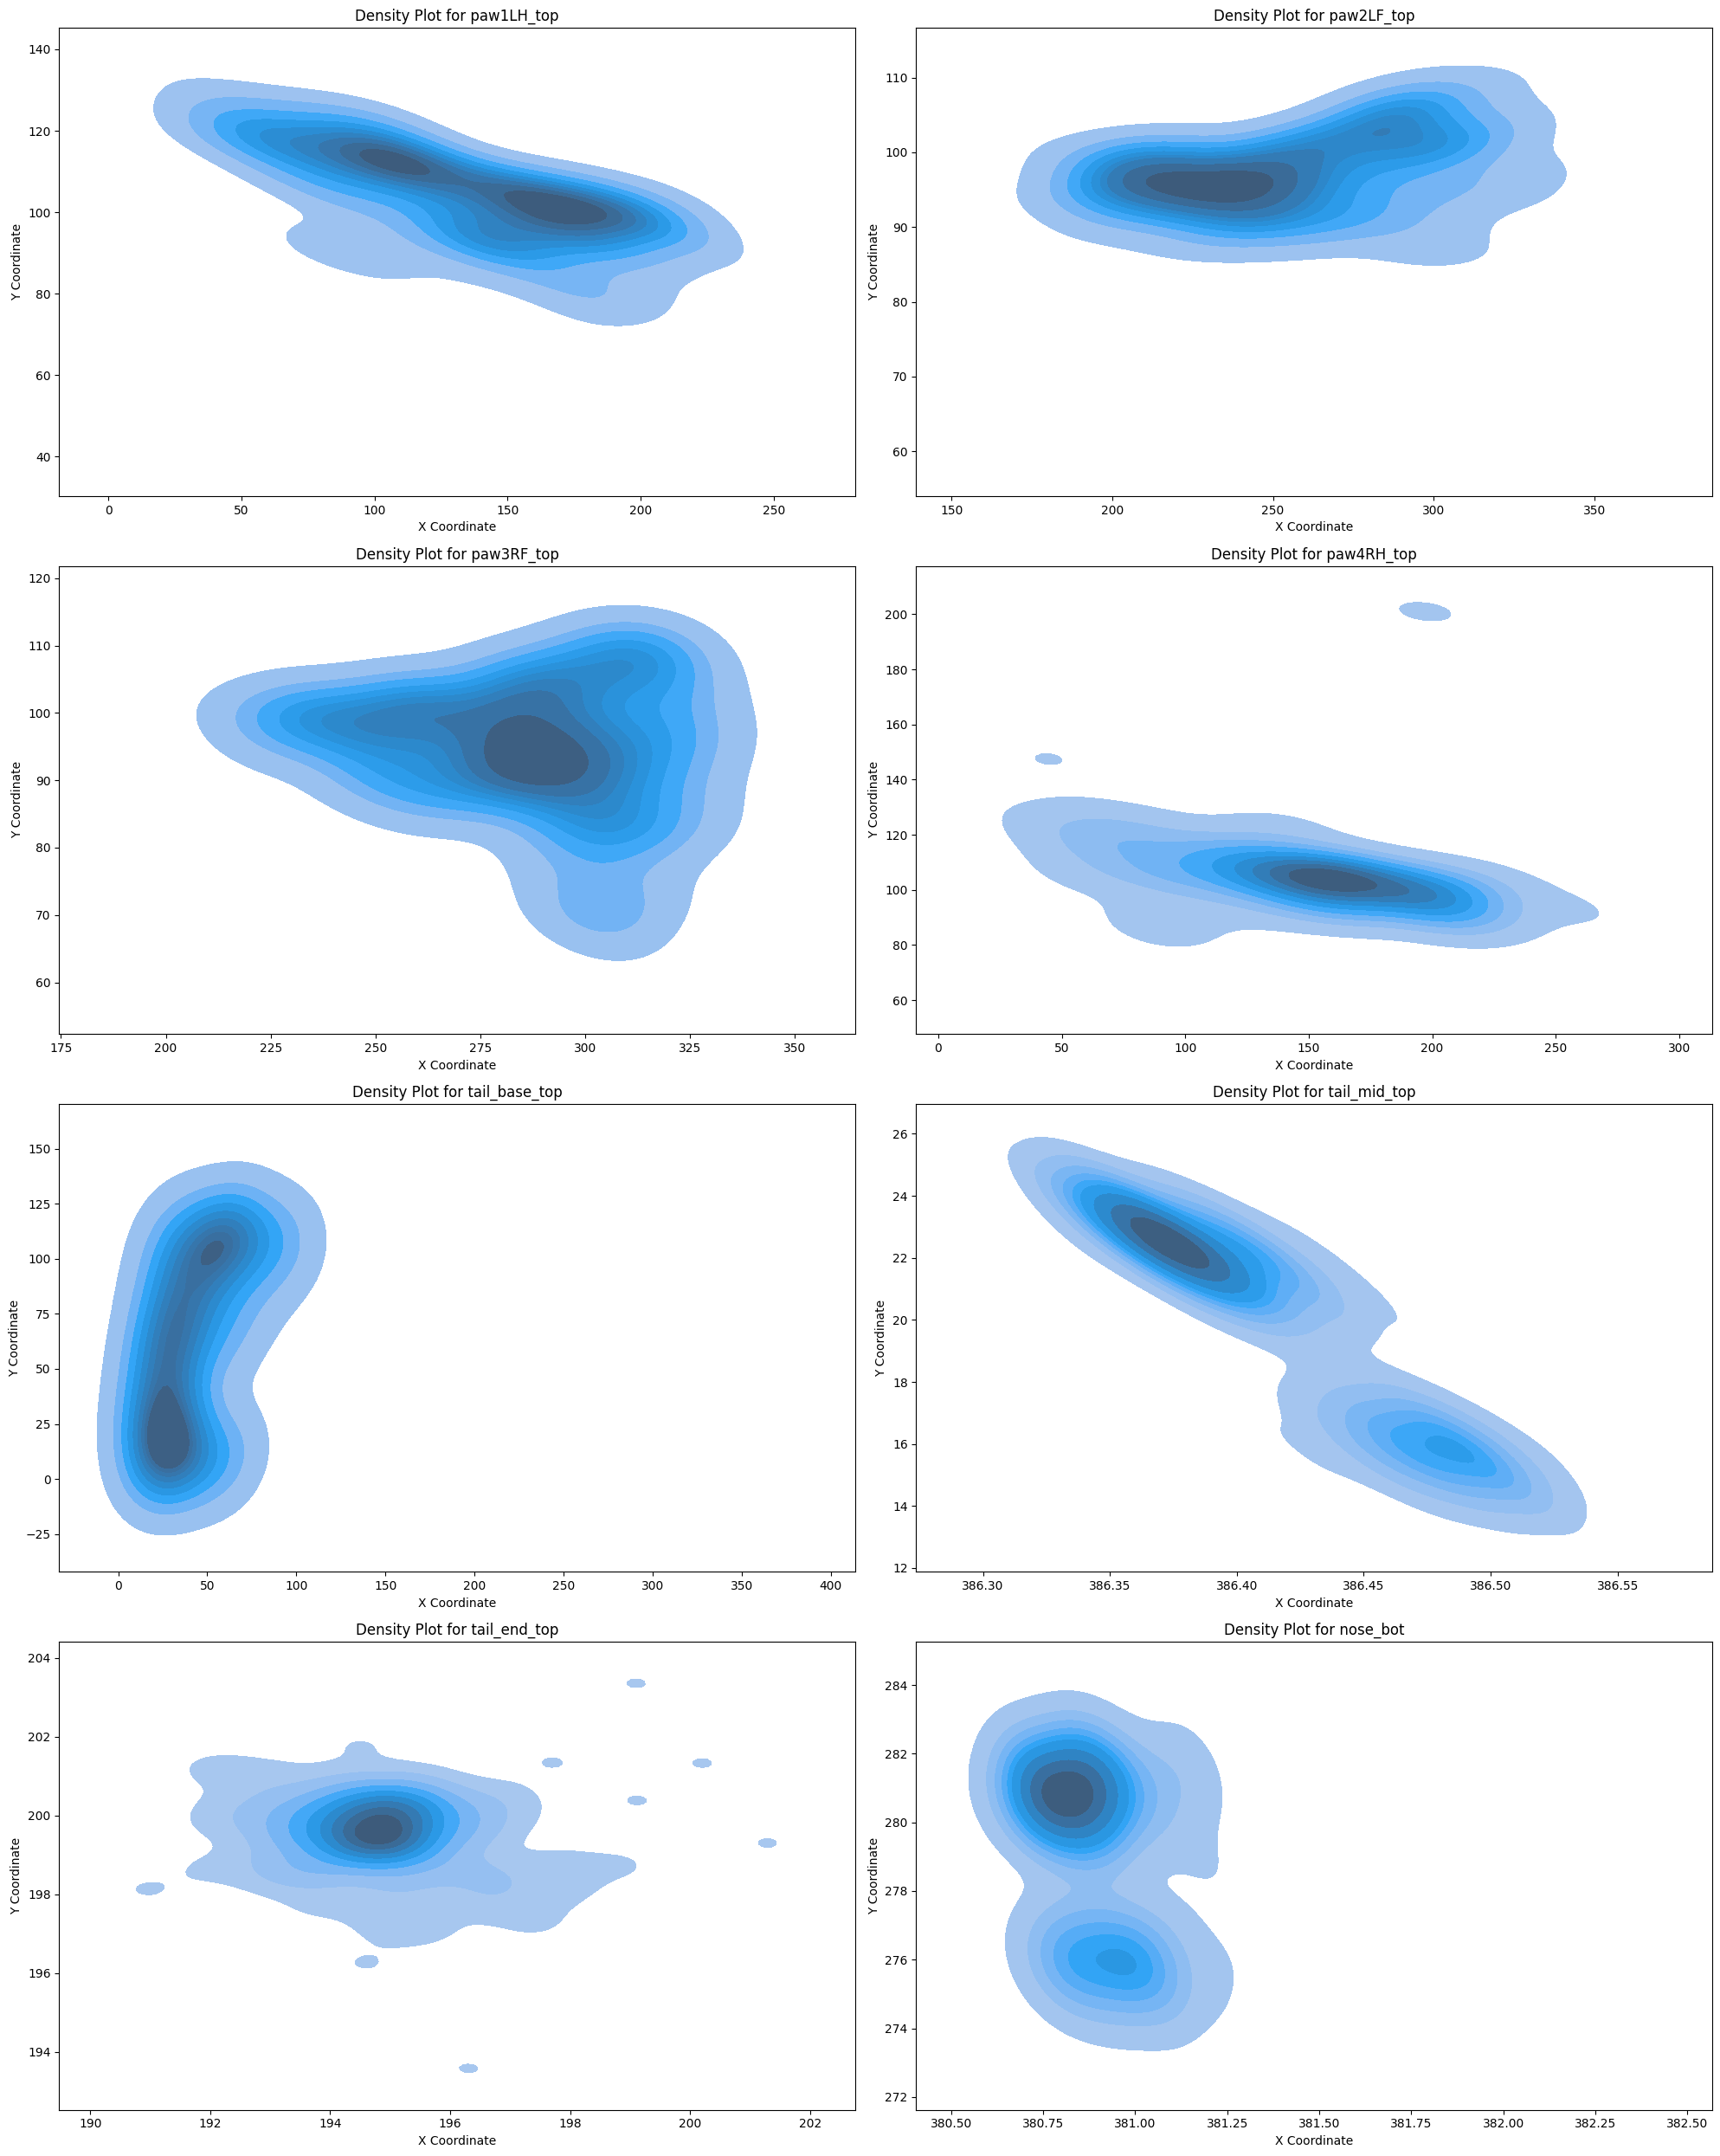

In [18]:
# Scatter Plot for Coordinates
plt.figure(figsize=(15, 10))
sns.scatterplot(data=new_df, x='x', y='y', hue='keypoint', alpha=0.6, palette='tab10')
plt.title('Scatter Plot of Keypoint Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(loc='best')
plt.show()

# Histogram for Likelihood Values
plt.figure(figsize=(15, 10))
sns.histplot(new_df['likelihood'], bins=50, kde=True)
plt.title('Histogram of Likelihood Values')
plt.xlabel('Likelihood')
plt.ylabel('Count')
plt.show()

# Density Plot for Coordinates of Each Keypoint
keypoints = new_df['keypoint'].unique()
plt.figure(figsize=(20, 25))

for i, keypoint in enumerate(keypoints):
    plt.subplot(4, 2, i + 1)
    subset = new_df[new_df['keypoint'] == keypoint]
    sns.kdeplot(x=subset['x'], y=subset['y'], fill=True)
    plt.title(f'Density Plot for {keypoint}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

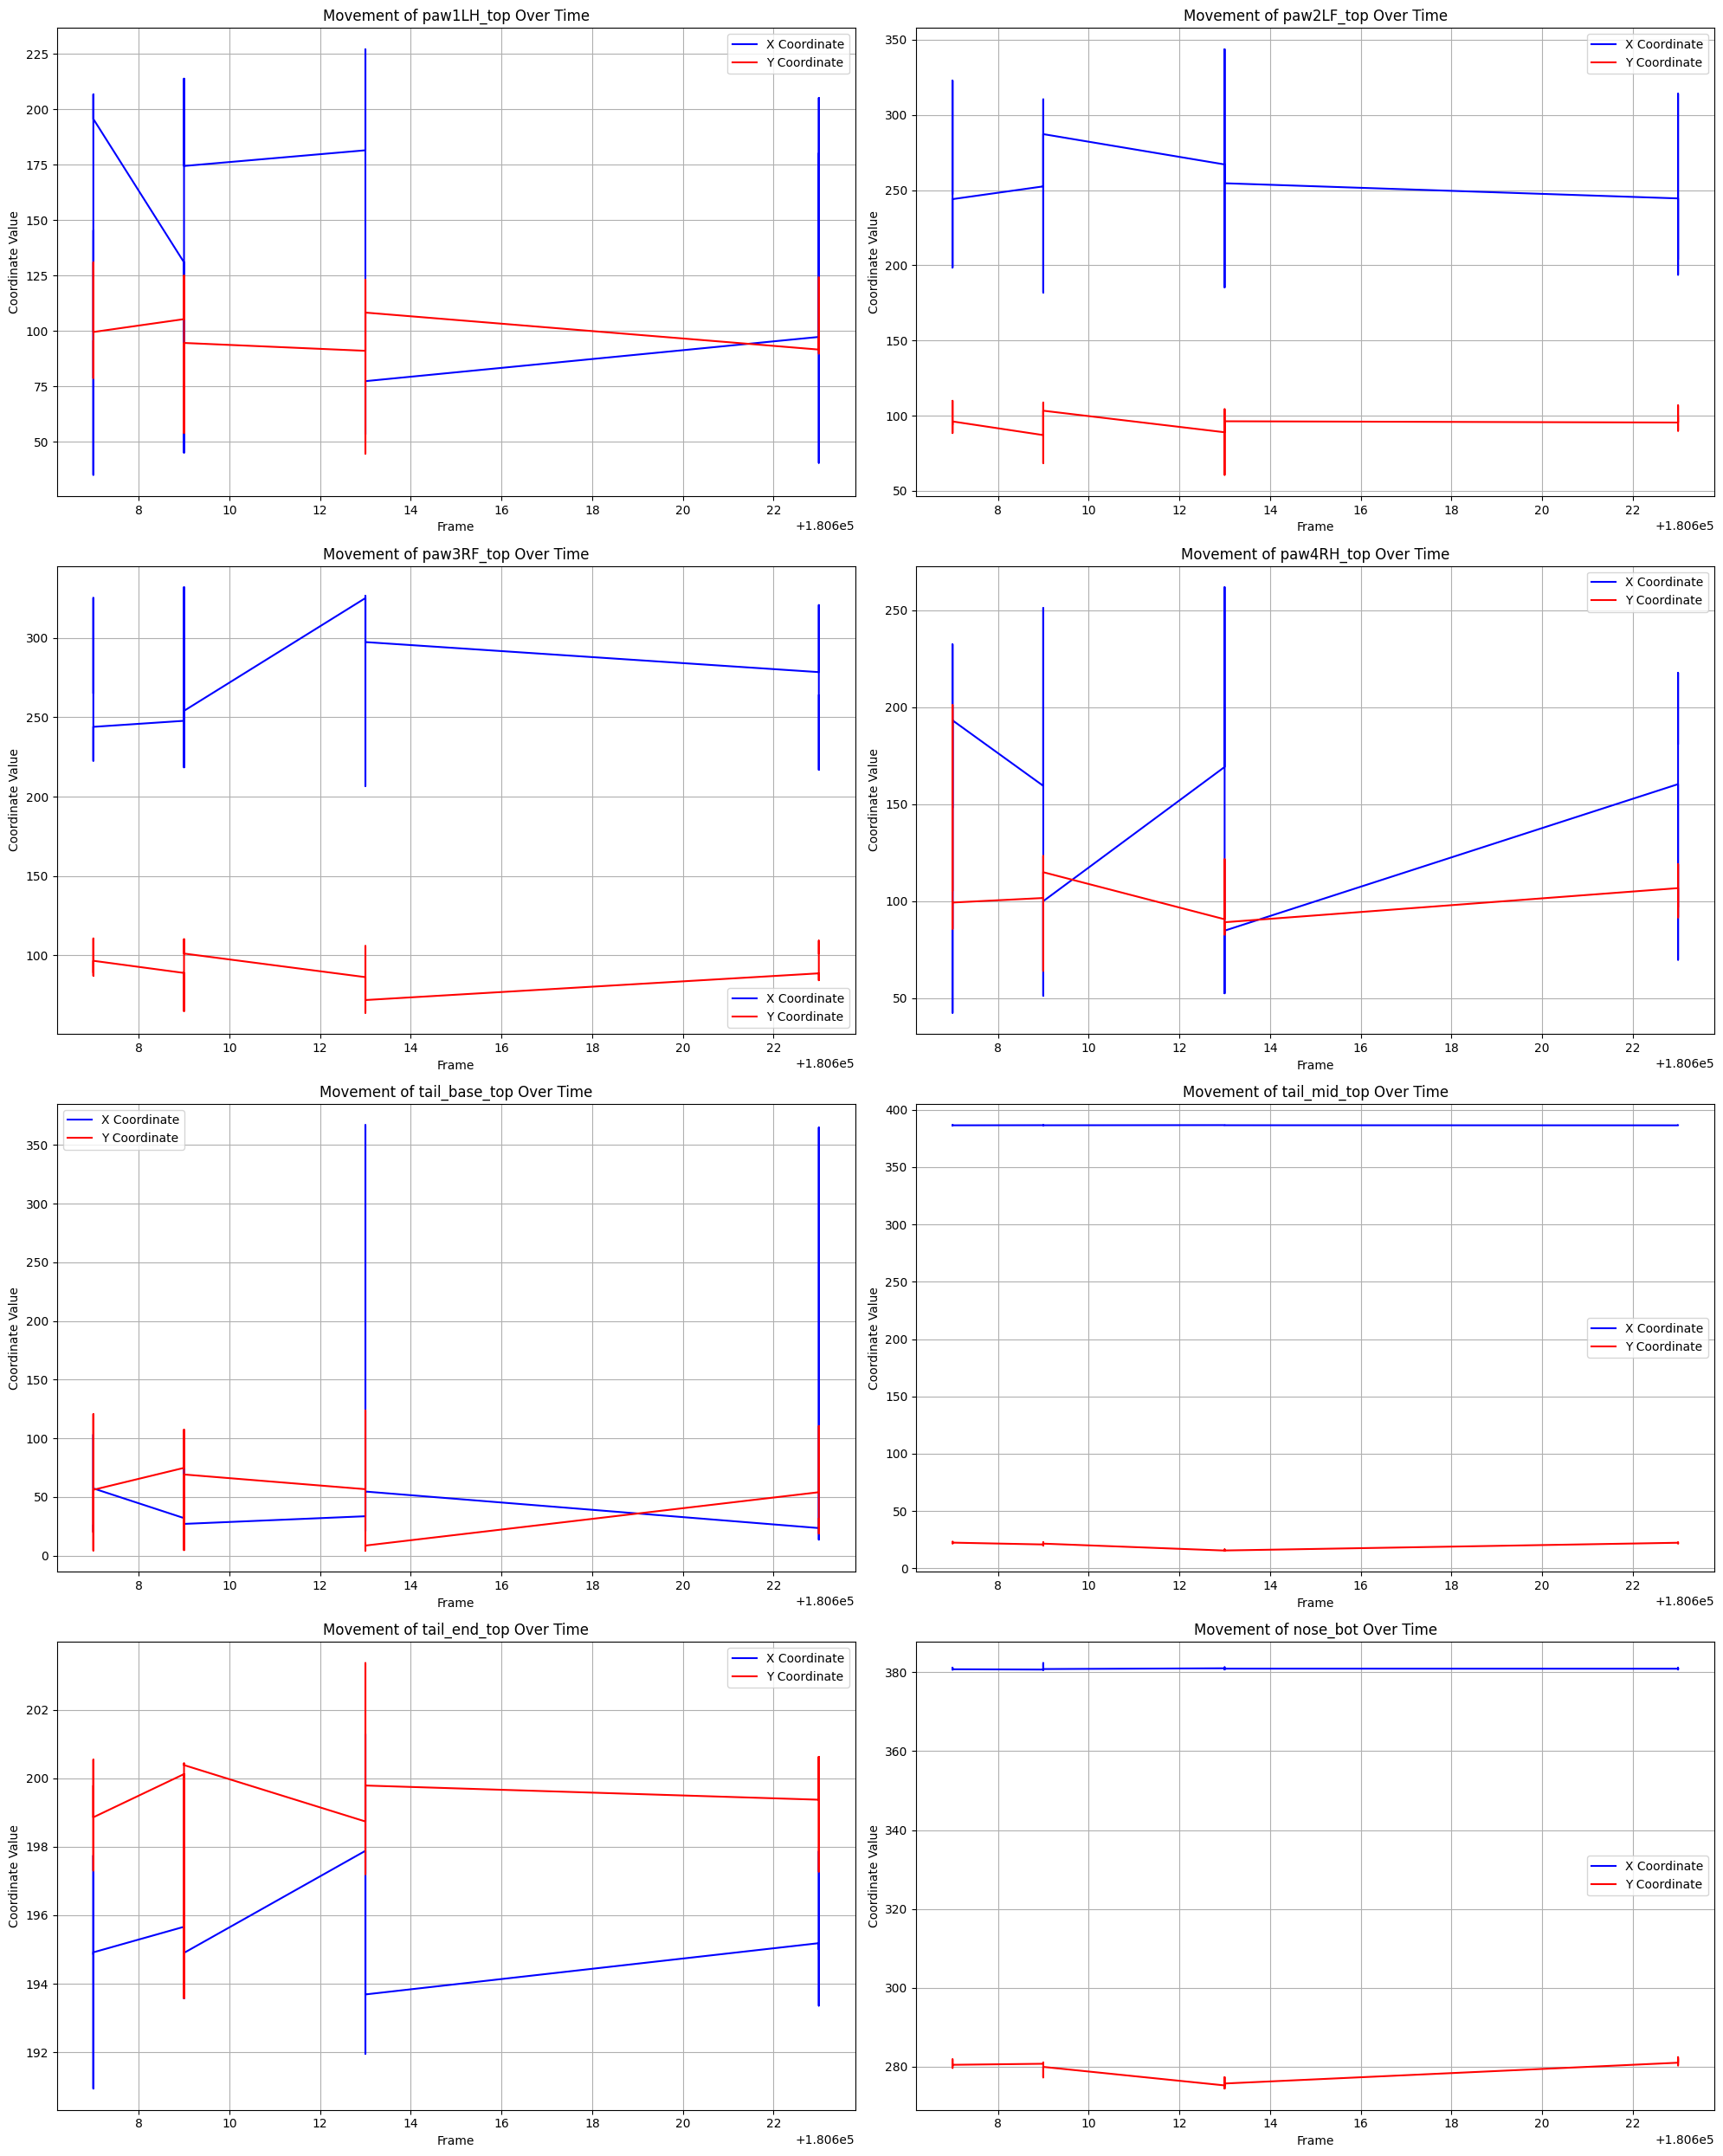

In [23]:
# Check the type of 'frame' column and convert to numeric if necessary
if new_df['frame'].dtype != 'int':
    new_df['frame'] = pd.to_numeric(new_df['frame'].str.extract(r'(\d+)', expand=False), errors='coerce')

# Drop rows with NaN values in 'frame' column if any
new_df = new_df.dropna(subset=['frame'])

# Convert 'frame' column to integer
new_df['frame'] = new_df['frame'].astype(int)

# Line Plot for Keypoints' Movement Over Time
keypoints = new_df['keypoint'].unique()
plt.figure(figsize=(20, 25))

for i, keypoint in enumerate(keypoints):
    plt.subplot(4, 2, i + 1)
    subset = new_df[new_df['keypoint'] == keypoint]
    plt.plot(subset['frame'], subset['x'], label='X Coordinate', color='blue')
    plt.plot(subset['frame'], subset['y'], label='Y Coordinate', color='red')
    plt.title(f'Movement of {keypoint} Over Time')
    plt.xlabel('Frame')
    plt.ylabel('Coordinate Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()